In [1]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('/Users/xinyue/Desktop/Project 2/filtered_data_from_count_40/Sheet 1-filtered_data_from_count_40.csv')


# List of suburbs extracted from the image
suburbs = [
    "Albert Park-Middle Park-West St Kilda", "Armadale", "Carlton North", "Carlton-Parkville", "CBD-St Kilda Rd",
    "Collingwood-Abbotsford", "Docklands", "East Melbourne", "East St Kilda", "Elwood", "Fitzroy",
    "Fitzroy North-Clifton Hill", "Flemington-Kensington", "North Melbourne-West Melbourne", "Port Melbourne",
    "Prahran-Windsor", "Richmond-Burnley", "South Melbourne", "South Yarra", "Southbank", "St Kilda", "Toorak", "Group Total"
]

# Add the new 'Suburb' column to the dataframe
df['Suburb'] = suburbs[:len(df)]  # Ensure to match the length of existing data



# Display the first few rows of the DataFrame
print(df.head())


        Unnamed: 0  Count.40  Median.40  Count.41  Median.41  Count.42  \
0  Inner Melbourne       956        425       954        425       978   
1              NaN       589        360       600        360       620   
2              NaN       487        420       483        440       505   
3              NaN      3369        340      3350        340      3221   
4              NaN      5612        410      5628        410      5703   

   Median.42  Count.43  Median.43  Count.44  ...  Median.76  Count.77  \
0        430       961        445       927  ...        552       886   
1        365       616        370       651  ...        480       739   
2        450       515        450       544  ...        580       495   
3        340      3179        340      3266  ...        435      4451   
4        420      5959        420      6247  ...        500     10798   

   Median.77  Count.78  Median.78  Count.79  Median.79  Count.92  Median.92  \
0        560       857        565    

In [ ]:
print(df["Suburb"])

0                            Berwick
1                         Cranbourne
2                          Dandenong
3    Dandenong North-Endeavour Hills
4          Narre Warren-Hampton Park
5                         Noble Park
6                           Pakenham
7                         Springvale
8                        Group Total
Name: Suburb, dtype: object


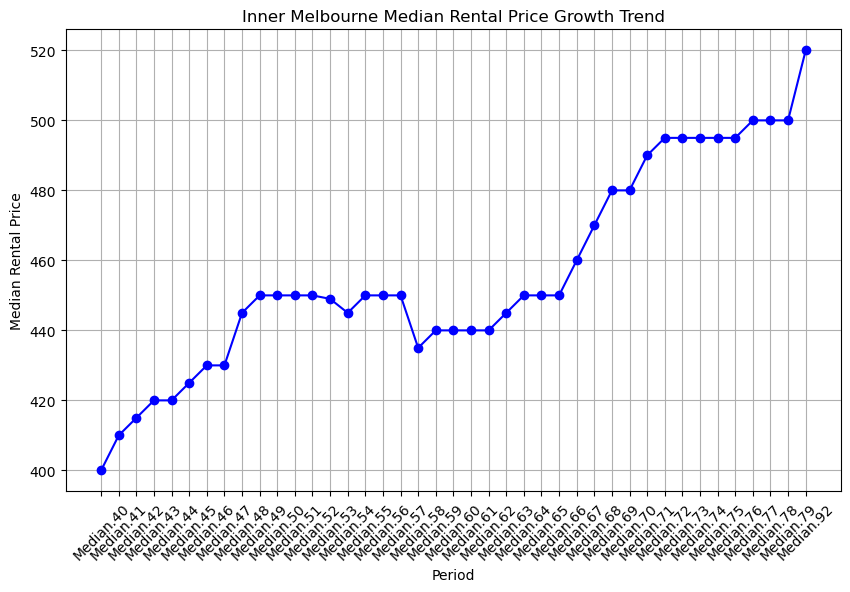

In [2]:
import matplotlib.pyplot as plt
# Filter out the columns that contain 'Median' in their name
median_columns = [col for col in df.columns if 'Median' in col]

# Extract only the 'Median' columns
median_data = df[median_columns]

# Calculate the median for each period across all suburbs
median_trend = median_data.median()

# Plotting the median rental price growth trend
plt.figure(figsize=(10, 6))
plt.plot(median_trend.index, median_trend.values, marker='o', linestyle='-', color='b')
plt.title('Inner Melbourne Median Rental Price Growth Trend')
plt.xlabel('Period')
plt.ylabel('Median Rental Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

                                   Suburb  Median.40  Median.41  Median.42  \
0   Albert Park-Middle Park-West St Kilda        NaN   0.000000   1.176471   
1                                Armadale        NaN   0.000000   1.388889   
2                           Carlton North        NaN   4.761905   2.272727   
3                       Carlton-Parkville        NaN   0.000000   0.000000   
4                         CBD-St Kilda Rd        NaN   0.000000   2.439024   
5                  Collingwood-Abbotsford        NaN   2.500000   2.439024   
6                               Docklands        NaN   0.000000   2.000000   
7                          East Melbourne        NaN   1.234568   1.219512   
8                           East St Kilda        NaN   1.515152   2.985075   
9                                  Elwood        NaN   2.857143   0.000000   
10                                Fitzroy        NaN   0.000000   0.000000   
11             Fitzroy North-Clifton Hill        NaN   2.380952 

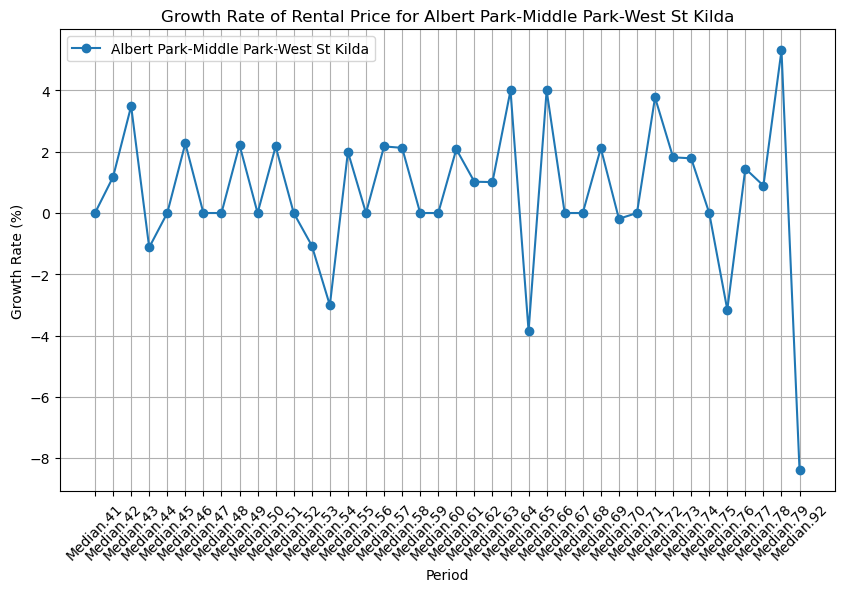

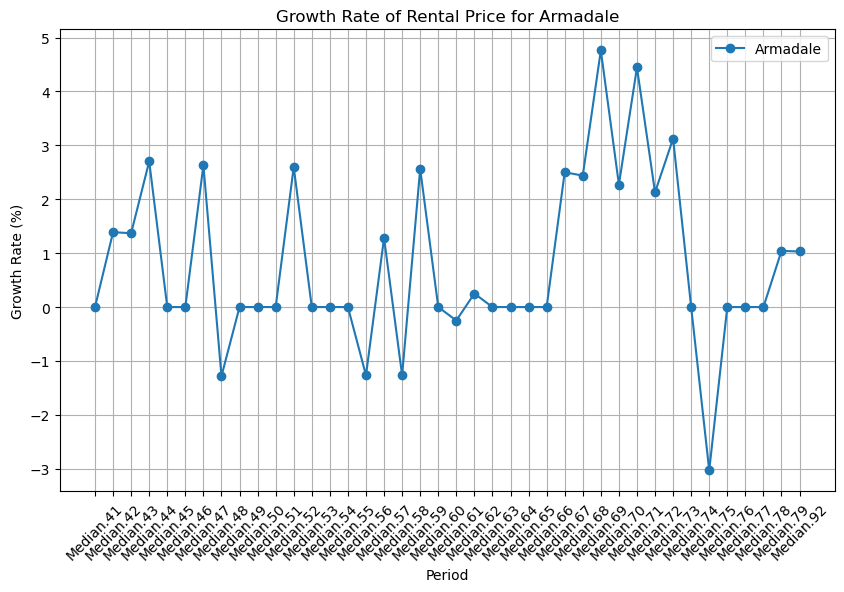

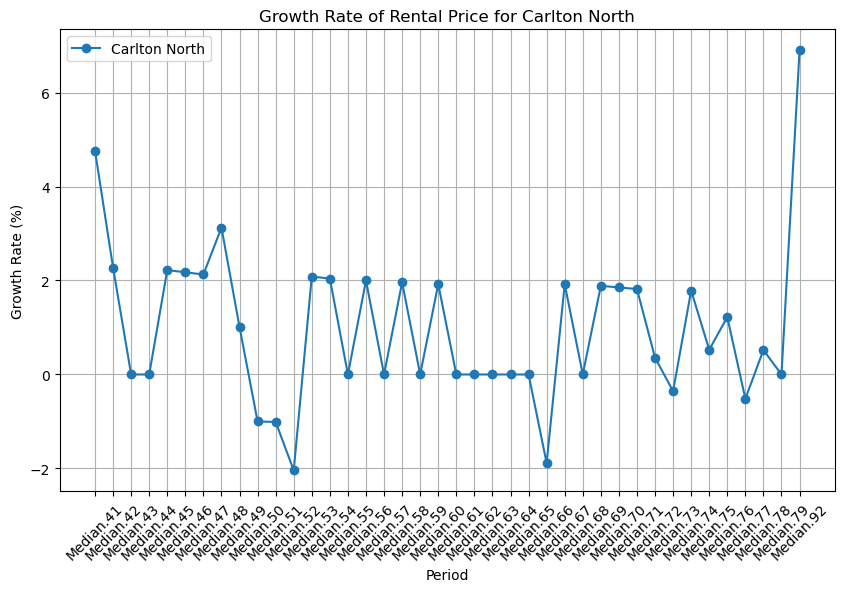

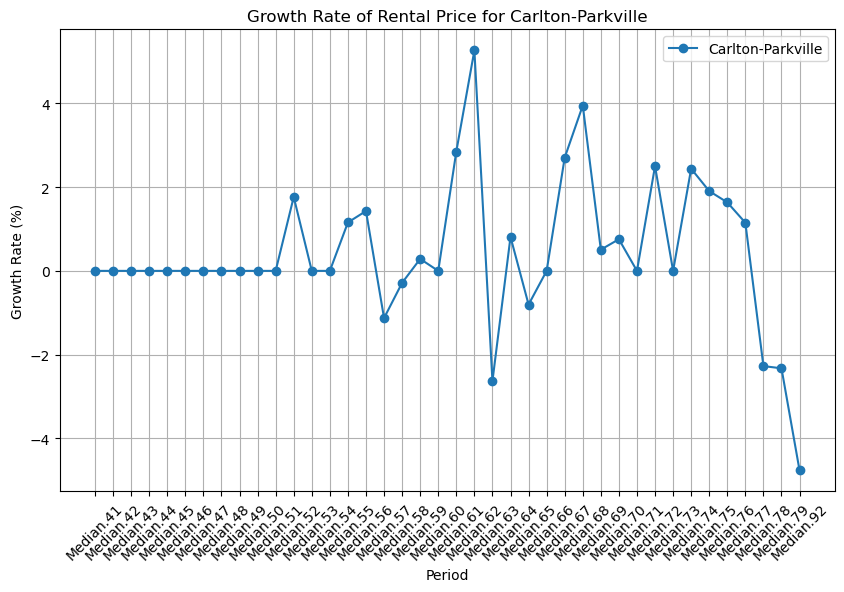

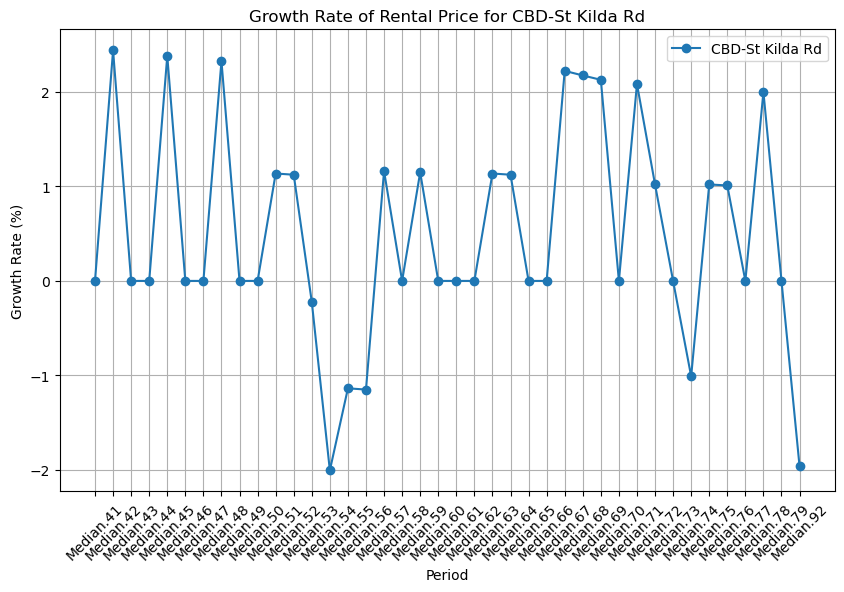

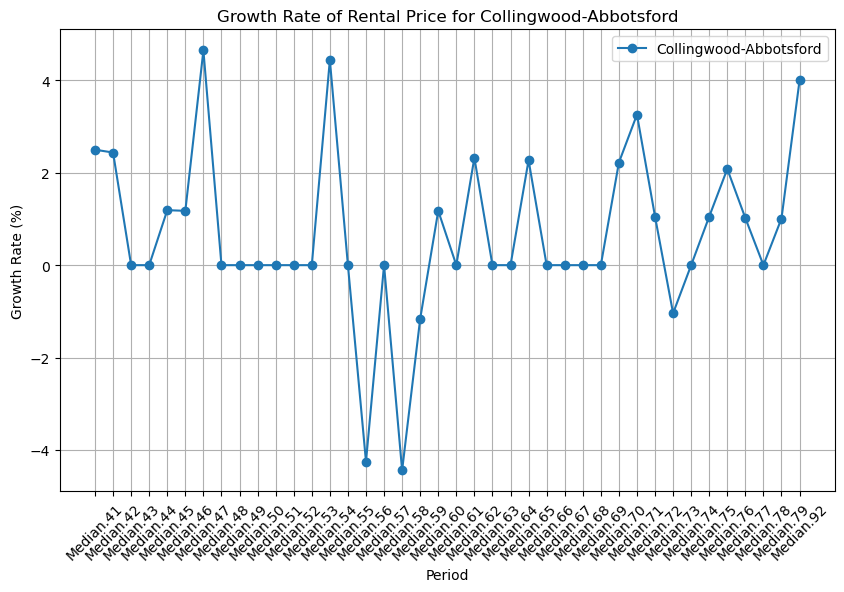

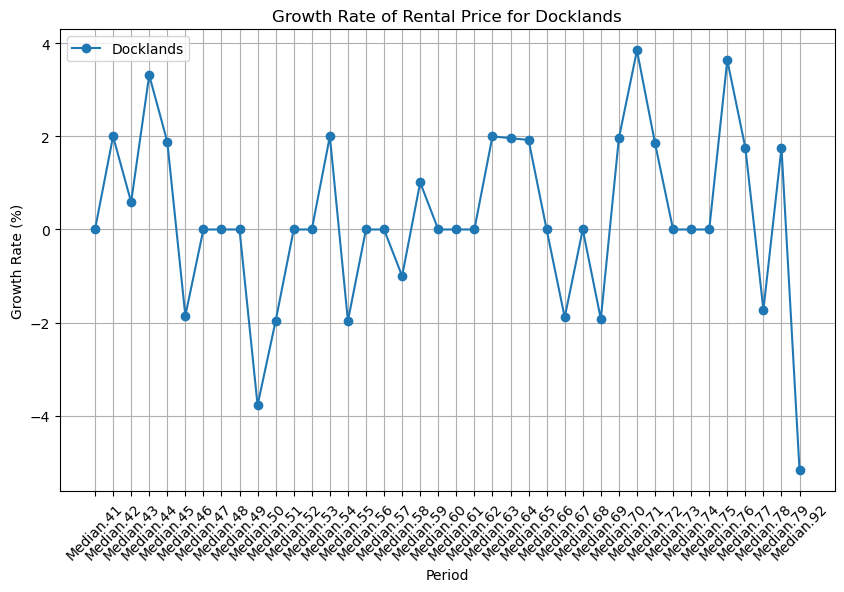

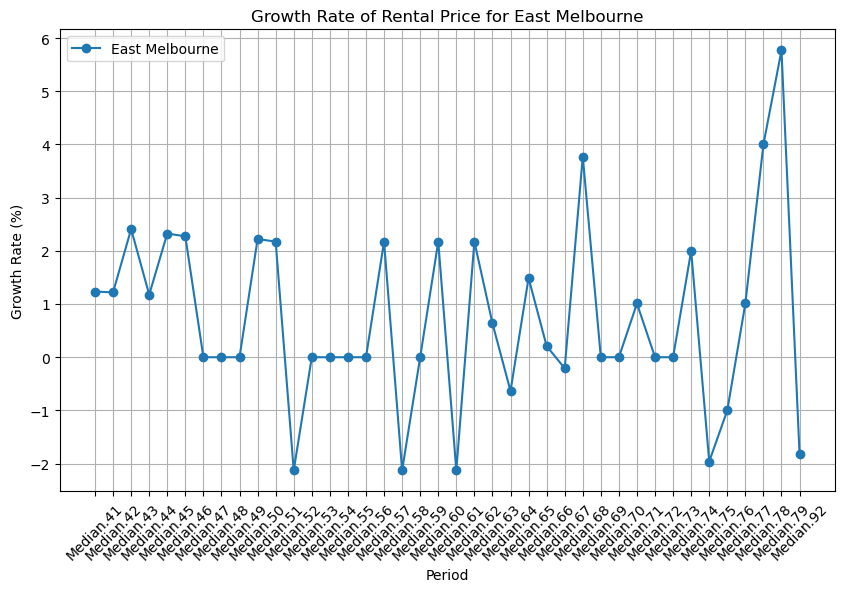

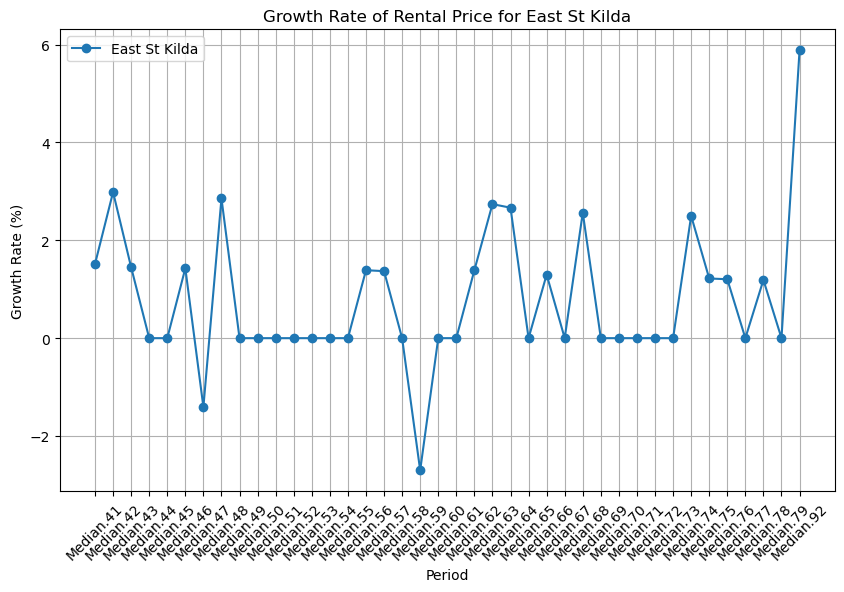

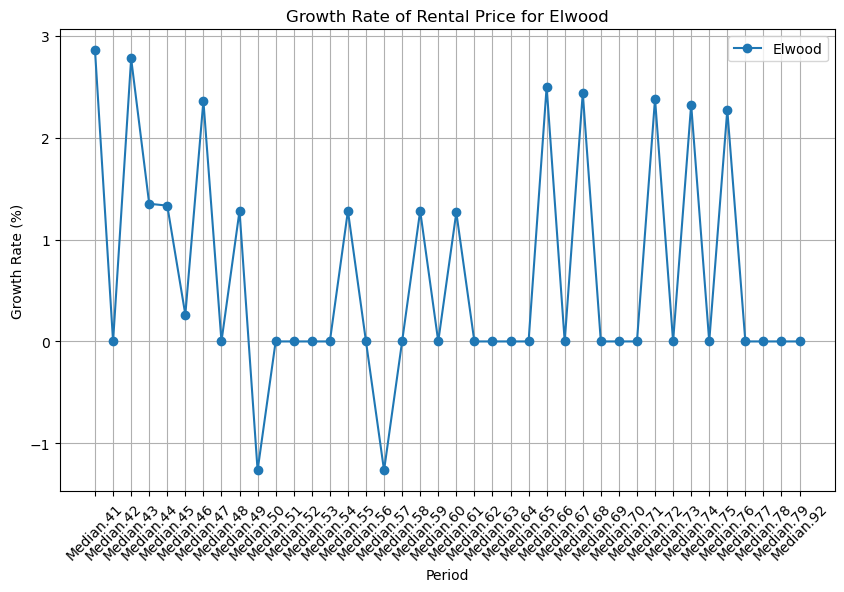

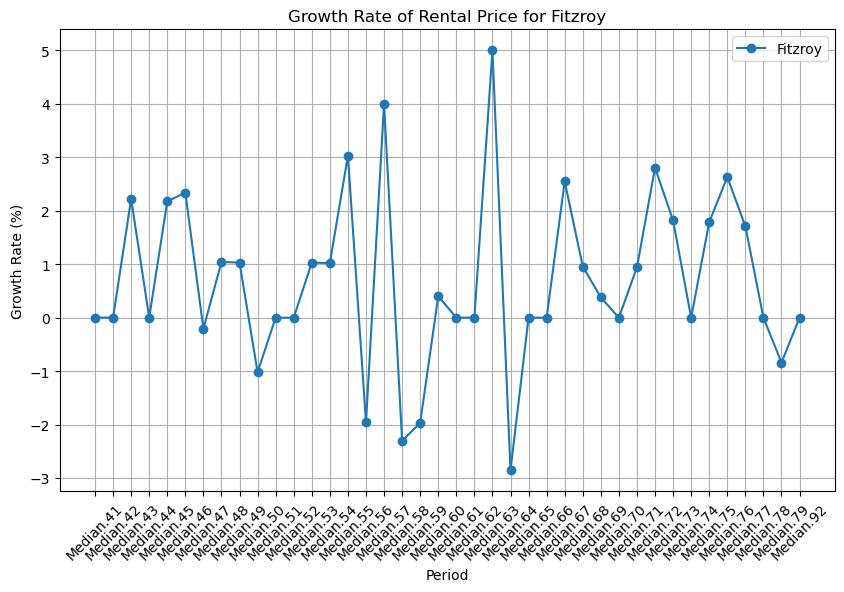

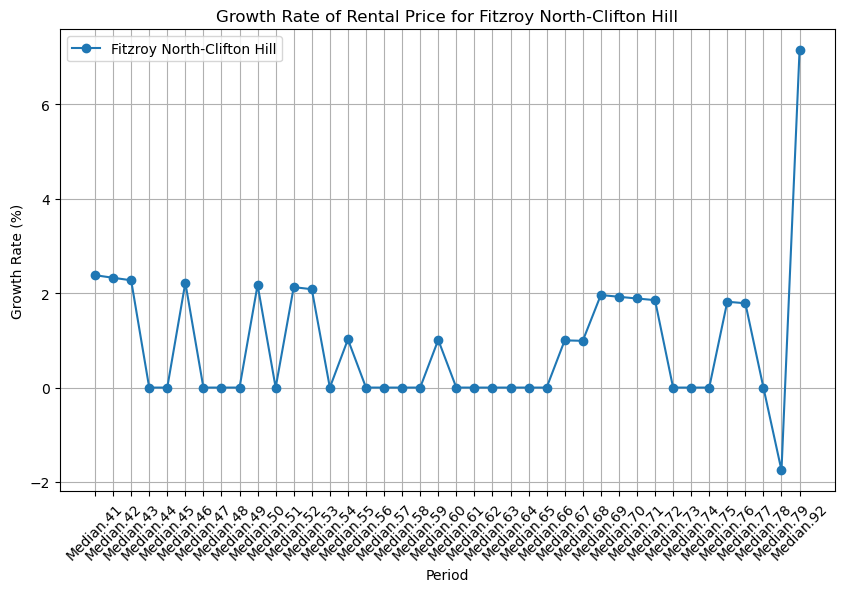

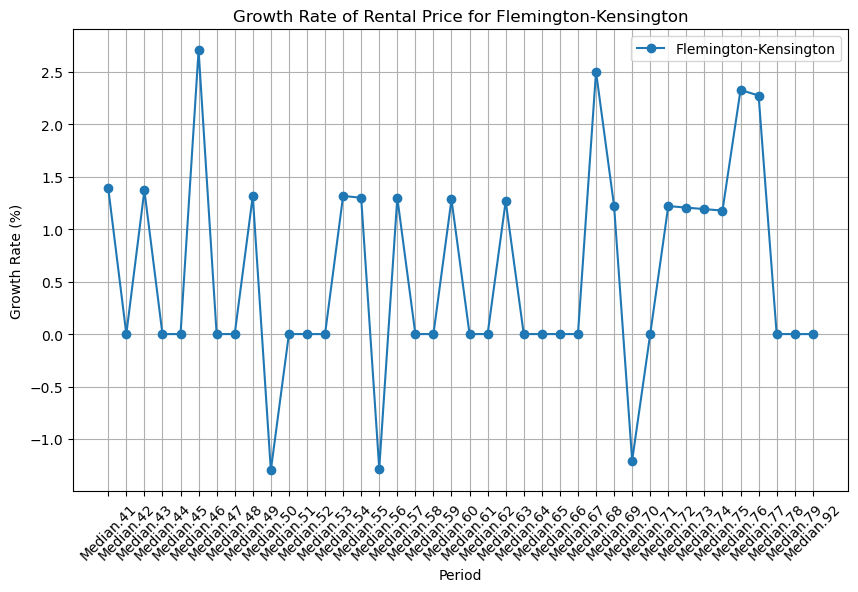

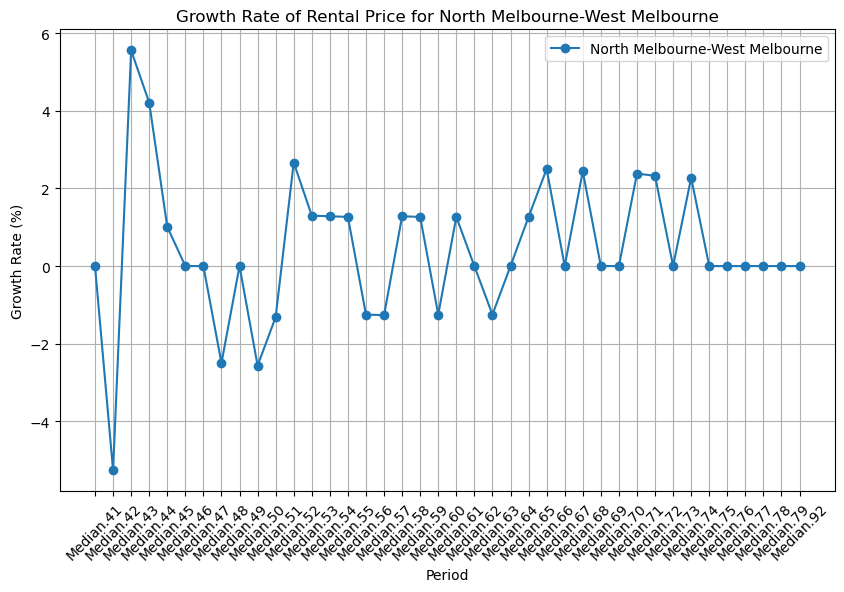

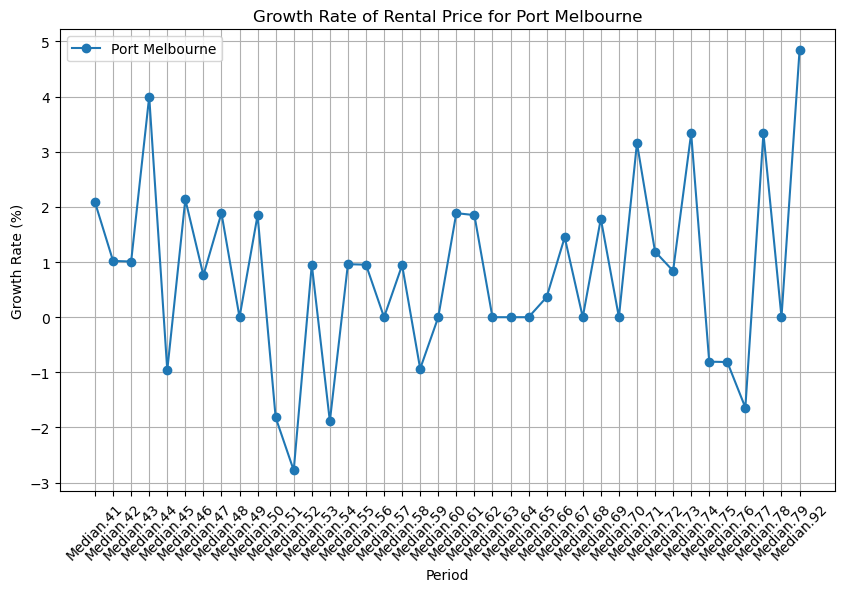

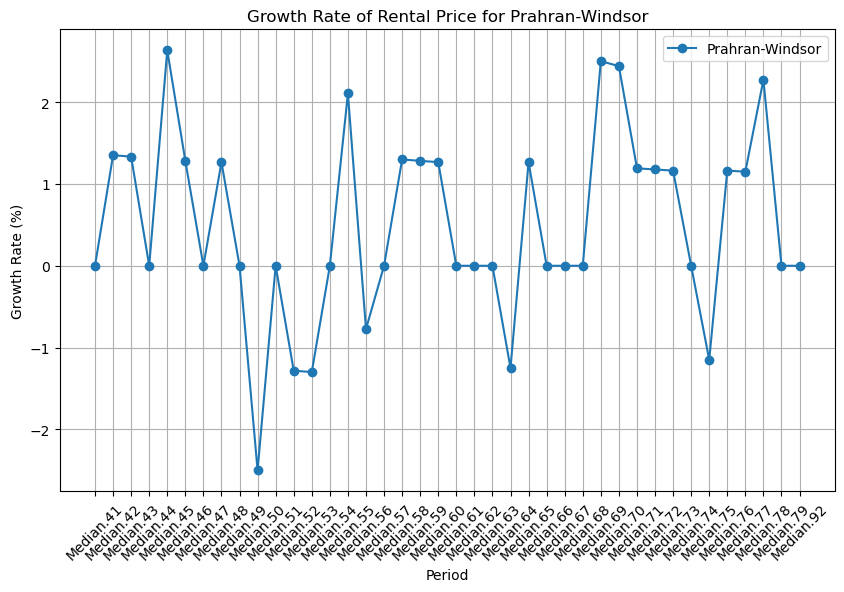

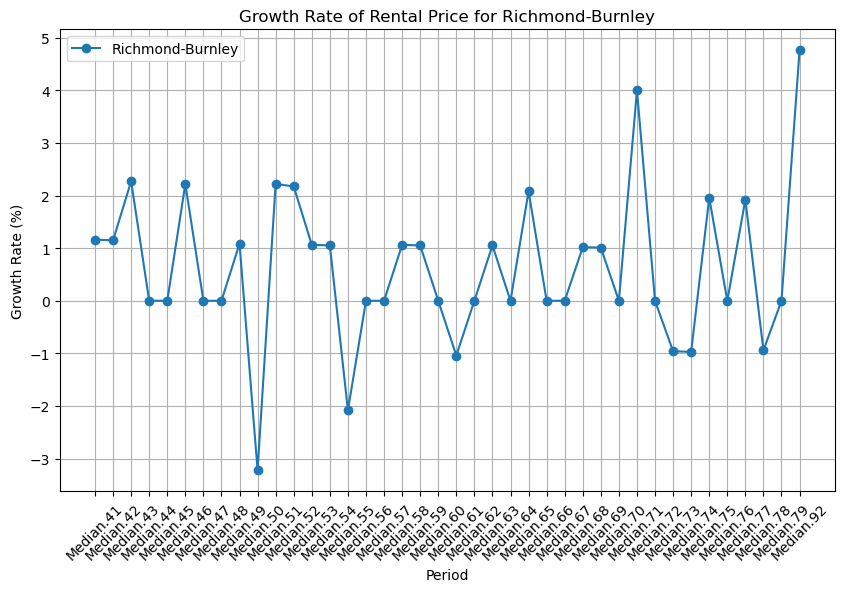

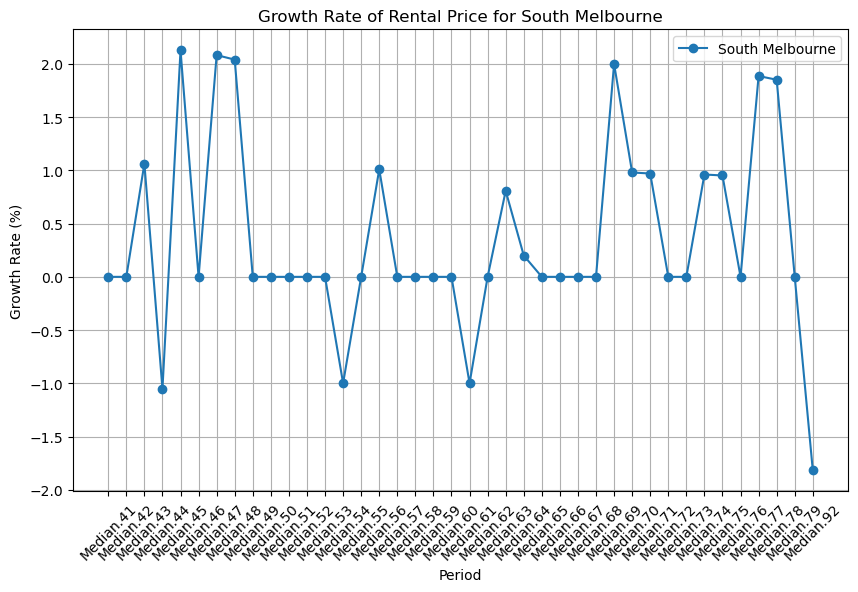

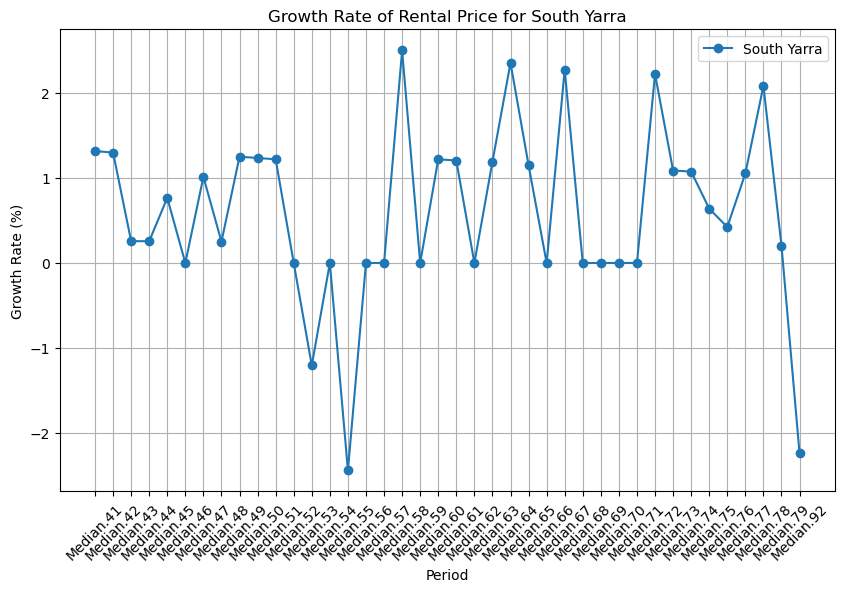

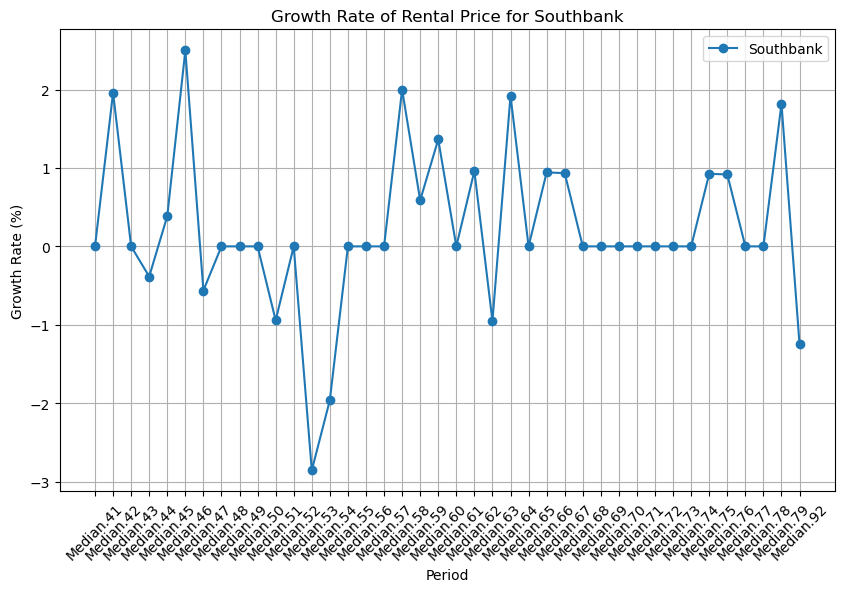

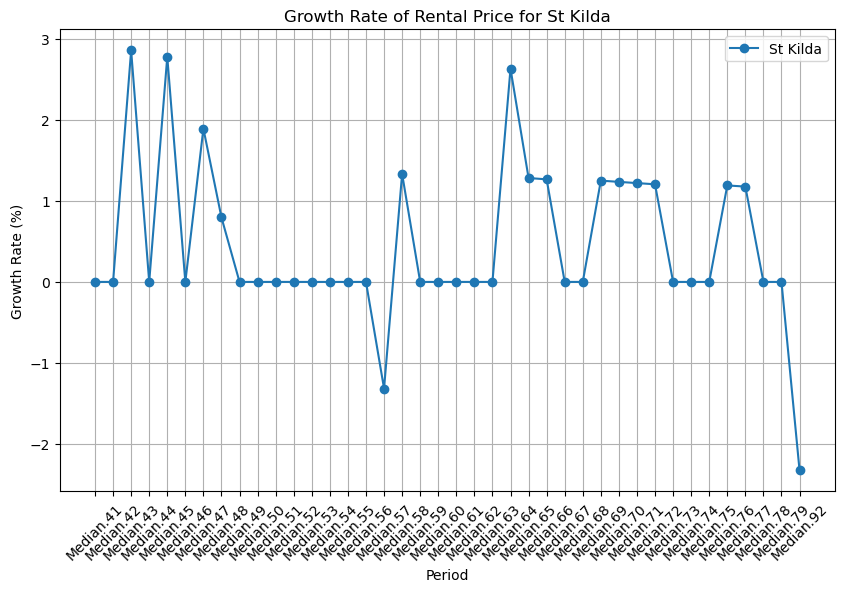

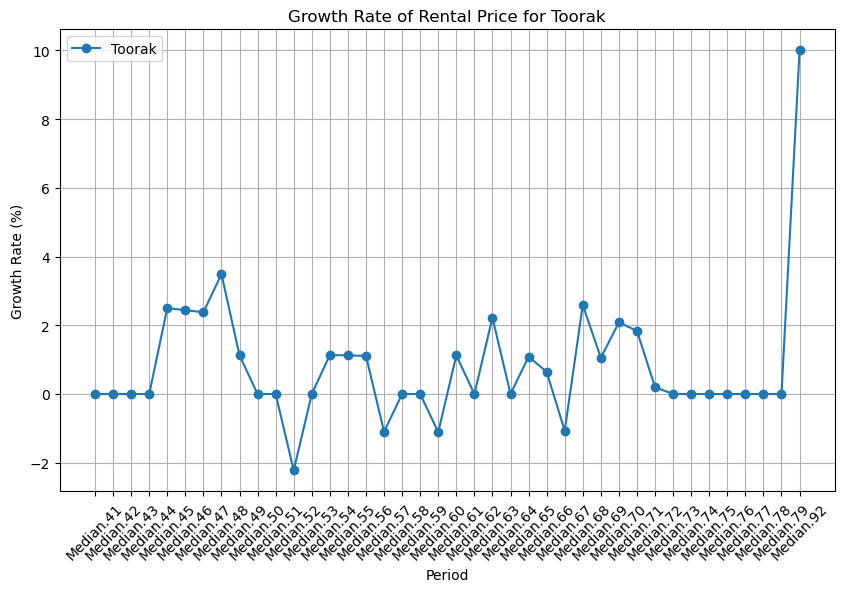

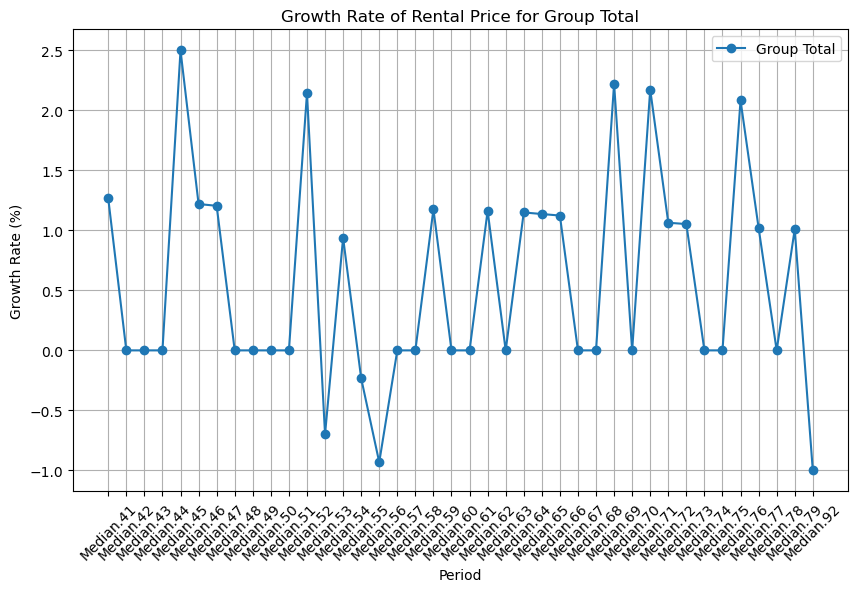

In [3]:
# Extract columns related to the median rental prices
median_columns = [col for col in df.columns if 'Median' in col]

# Subset the data to include only the suburb and median columns
median_data = df[['Suburb'] + median_columns].copy()

# Calculate the growth rate for each suburb separately
growth_rate_data = pd.DataFrame()

for suburb in median_data['Suburb'].unique():
    # Filter the data for the specific suburb
    suburb_data = median_data[median_data['Suburb'] == suburb]
    
    # Compute the percentage change in the median columns, ignoring the 'Suburb' column
    growth_rate = suburb_data[median_columns].pct_change(axis='columns') * 100  # Calculate percentage change
    growth_rate.insert(0, 'Suburb', suburb)  # Add suburb name back into the DataFrame
    
    # Append to the main growth rate DataFrame
    growth_rate_data = pd.concat([growth_rate_data, growth_rate], ignore_index=True)

# Display the growth rate data
print(growth_rate_data)

# Plotting the growth rate for each suburb
for suburb in growth_rate_data['Suburb'].unique():
    suburb_growth = growth_rate_data[growth_rate_data['Suburb'] == suburb].dropna(axis=1)
    
    # Plotting the growth rate
    plt.figure(figsize=(10, 6))
    plt.plot(suburb_growth.columns[1:], suburb_growth.iloc[0, 1:], marker='o', linestyle='-', label=suburb)
    plt.title(f'Growth Rate of Rental Price for {suburb}')
    plt.xlabel('Period')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

In [4]:
# Compute the average growth rate across all periods for each suburb
growth_rate_data['Average Growth Rate (%)'] = growth_rate_data[median_columns].mean(axis=1)
print(growth_rate_data['Average Growth Rate (%)'])

0     0.652388
1     0.785914
2     0.991948
3     0.422277
4     0.503810
5     0.674358
6     0.255833
7     0.736282
8     0.788452
9     0.636090
10    0.692637
11    0.905547
12    0.564046
13    0.440709
14    0.773806
15    0.497053
16    0.627720
17    0.351681
18    0.591267
19    0.207815
20    0.461746
21    0.816131
22    0.569570
Name: Average Growth Rate (%), dtype: float64
